# Problem Statement
Does travel affect performance  of a team? 

In [1]:
# imports 
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy.stats import ttest_ind
# from ydata_profiling import ProfileReport

C:\Users\Hung Bui\AppData\Local\Temp\ipykernel_22328\717420921.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
pd.set_option('display.max_columns', None)

In [3]:
# File path for csv File
filepath = "./../data/raw/datathon_2024_dataset.csv"
astro_df = pd.read_csv(filepath, index_col=0)

In [4]:
astro_df.head()

,game_date,home_team,away_team,is_day_game,home_score,away_score,venue,venue_name,city,state,home_pa,home_1b,home_2b,home_3b,home_hr,home_fo,home_so,home_bb,home_hbp,away_pa,away_1b,away_2b,away_3b,away_hr,away_fo,away_so,away_bb,away_hbp
0,20000329,NYN,CHN,False,3,5,TOK01,Tokyo Dome,Tokyo,JAP,45,9,1,0,2,17,5,10,1,38,5,1,0,1,24,4,3,0
1,20000330,CHN,NYN,False,1,5,TOK01,Tokyo Dome,Tokyo,JAP,48,3,2,0,1,28,5,8,1,44,5,0,0,0,24,9,6,0
2,20000403,ATL,COL,True,2,0,ATL02,Turner Field,Atlanta,GA,34,4,2,0,0,19,7,2,0,32,5,0,0,2,17,6,1,1
3,20000403,CIN,MIL,True,3,3,CIN08,Cinergy Field,Cincinnati,OH,27,6,1,0,0,14,1,5,0,20,3,1,0,1,10,4,1,0
4,20000403,FLO,SFN,False,6,4,MIA01,Sun Life Stadium,Miami,FL,36,5,2,2,1,17,8,1,0,38,9,3,0,0,17,7,1,1


In [6]:
astro_df.shape

(56775, 28)

### Missing Data

In [7]:
# check for missing data
astro_df.isna().sum()

game_date      0
home_team      0
away_team      0
is_day_game    0
home_score     0
away_score     0
venue          0
venue_name     0
city           0
state          0
home_pa        0
home_1b        0
home_2b        0
home_3b        0
home_hr        0
home_fo        0
home_so        0
home_bb        0
home_hbp       0
away_pa        0
away_1b        0
away_2b        0
away_3b        0
away_hr        0
away_fo        0
away_so        0
away_bb        0
away_hbp       0
dtype: int64

In [8]:
for i in astro_df.columns[1:]:
    if pd.api.types.is_numeric_dtype(astro_df[i]) and not pd.api.types.is_bool_dtype(astro_df[i]):
        q25, q75 = np.percentile(astro_df[i], 25), np.percentile(astro_df[i], 75)
        iqr = q75 - q25
    
        cut_off = iqr * 1.5
        lower = q25 - cut_off
        upper = q75 + cut_off
    
        astro_df = astro_df[(astro_df[i] > lower) | (astro_df[i] < upper)]
astro_df.shape

(1489, 28)

In [5]:
astro_df = astro_df[astro_df["state"] != "JAP"]

In [6]:
# Remove duplicates if any
astro_df.drop_duplicates().shape

(56765, 28)

In [7]:
# Numeric columns
numeric = astro_df.select_dtypes(include=["int64", "float64"])
numeric

,game_date,home_score,away_score,home_pa,home_1b,home_2b,home_3b,home_hr,home_fo,home_so,home_bb,home_hbp,away_pa,away_1b,away_2b,away_3b,away_hr,away_fo,away_so,away_bb,away_hbp
2,20000403,2,0,34,4,2,0,0,19,7,2,0,32,5,0,0,2,17,6,1,1
3,20000403,3,3,27,6,1,0,0,14,1,5,0,20,3,1,0,1,10,4,1,0
4,20000403,6,4,36,5,2,2,1,17,8,1,0,38,9,3,0,0,17,7,1,1
5,20000403,4,10,43,6,0,1,2,26,4,4,0,38,7,0,0,2,19,8,2,0
6,20000403,2,1,33,4,0,0,1,19,8,0,1,30,2,1,0,1,16,7,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56770,20231001,1,2,44,6,1,0,0,22,8,7,0,44,7,0,0,0,17,16,3,1
56771,20231001,5,2,34,3,1,0,1,20,8,1,0,38,4,4,0,1,16,7,6,0
56772,20231001,5,2,35,4,3,0,0,18,7,3,0,35,7,0,1,3,15,8,1,0
56773,20231001,1,0,30,3,1,0,0,15,11,0,0,30,4,0,0,0,14,10,1,1


c:\Users\Hung Bui\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


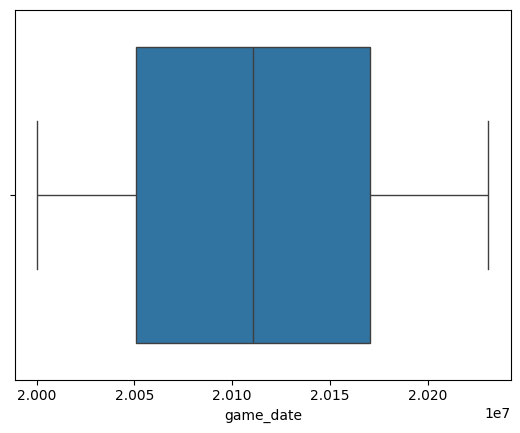

c:\Users\Hung Bui\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


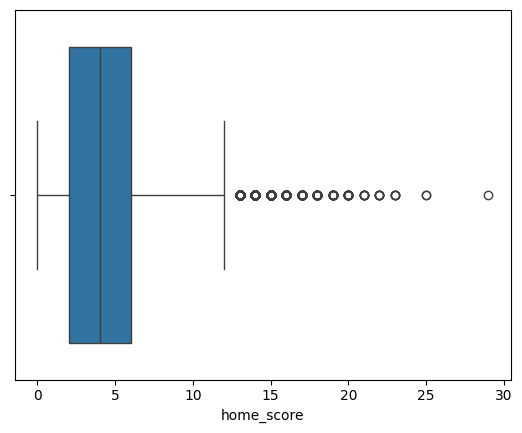

c:\Users\Hung Bui\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


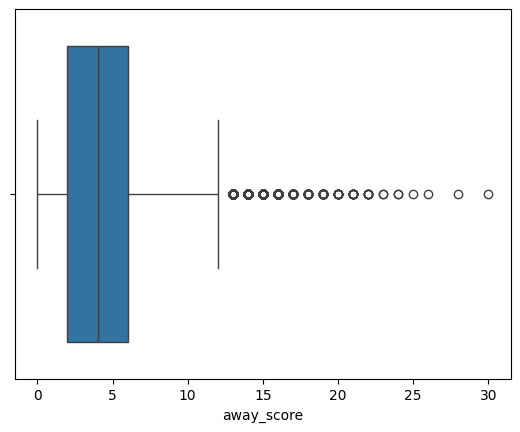

c:\Users\Hung Bui\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


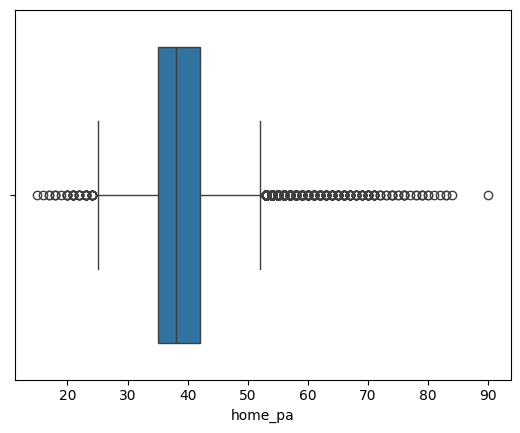

c:\Users\Hung Bui\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


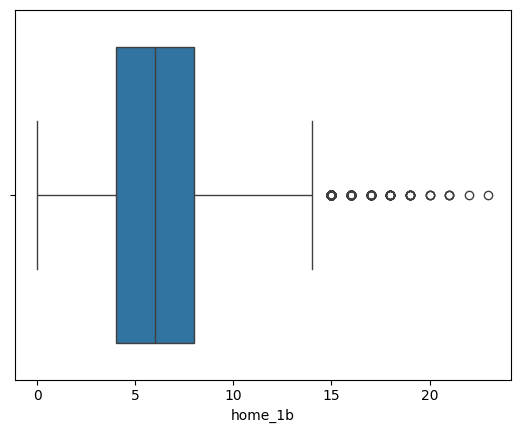

c:\Users\Hung Bui\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


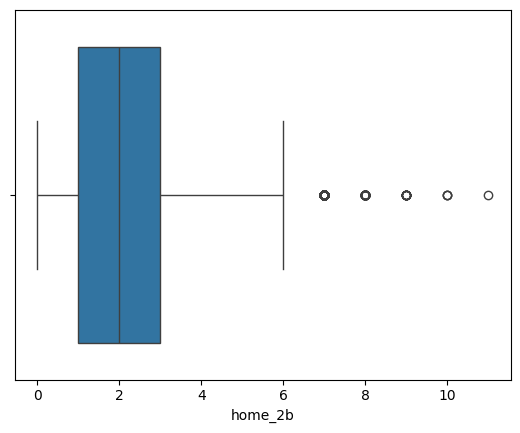

c:\Users\Hung Bui\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


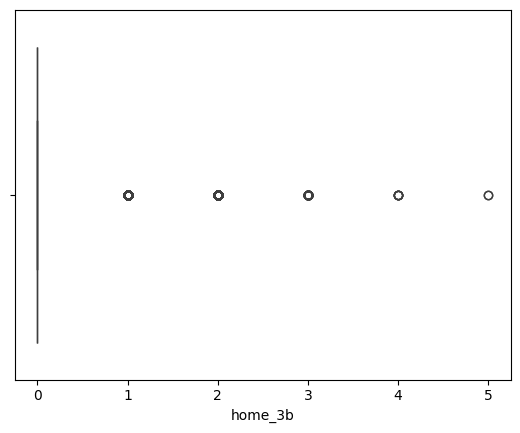

c:\Users\Hung Bui\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


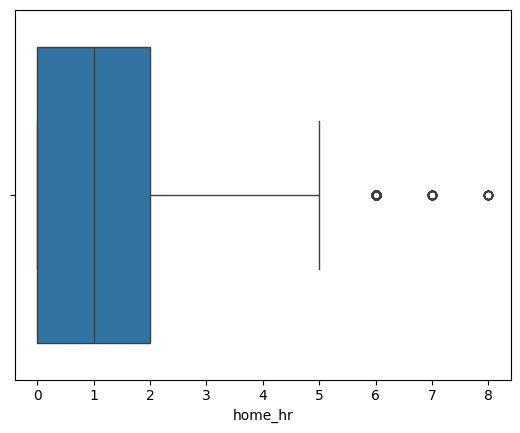

c:\Users\Hung Bui\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


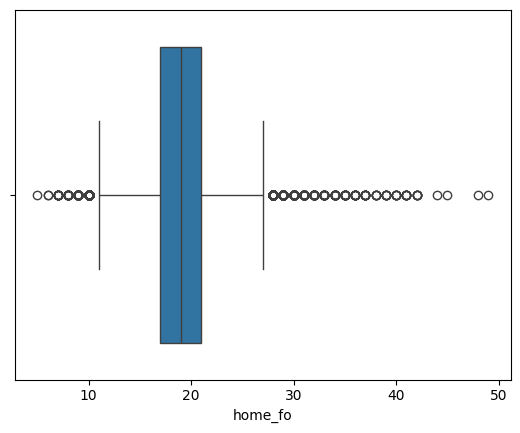

c:\Users\Hung Bui\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


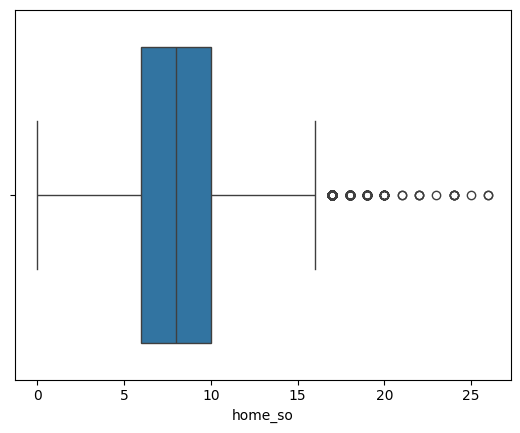

c:\Users\Hung Bui\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


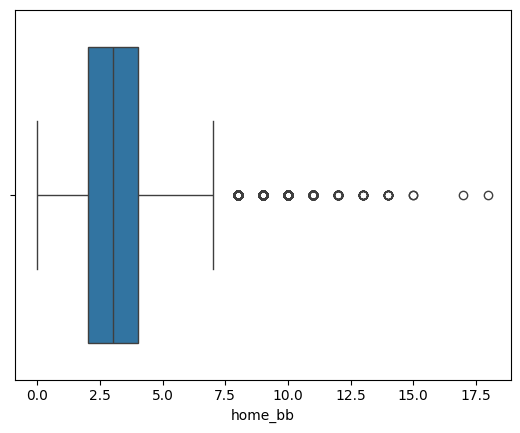

c:\Users\Hung Bui\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


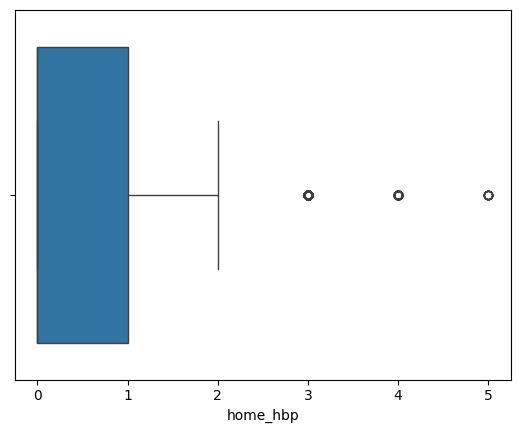

c:\Users\Hung Bui\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


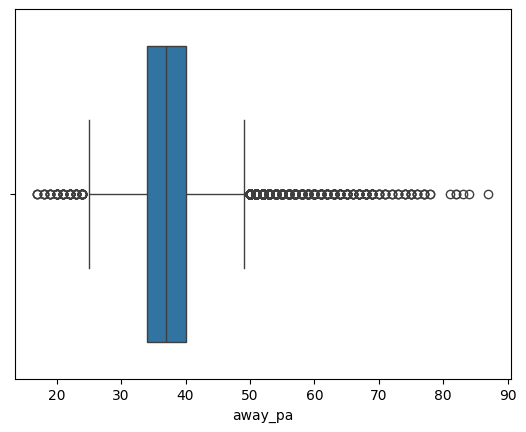

c:\Users\Hung Bui\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


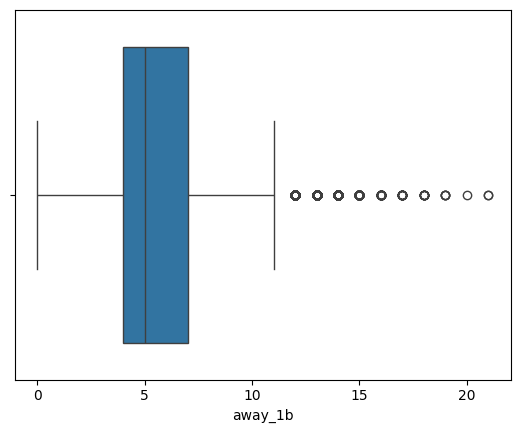

c:\Users\Hung Bui\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


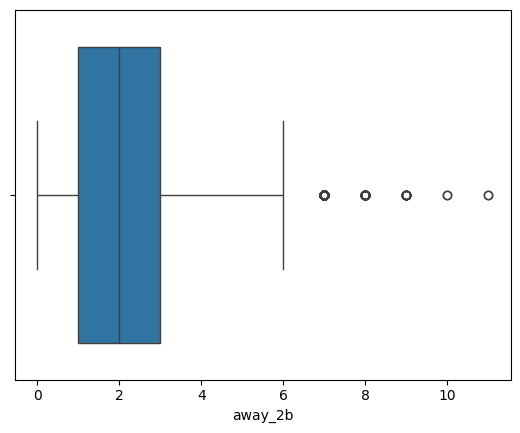

c:\Users\Hung Bui\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


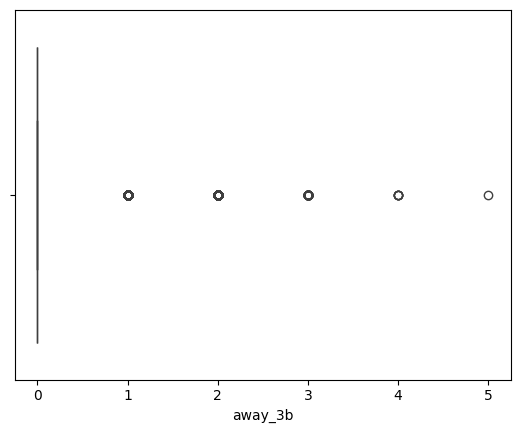

c:\Users\Hung Bui\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


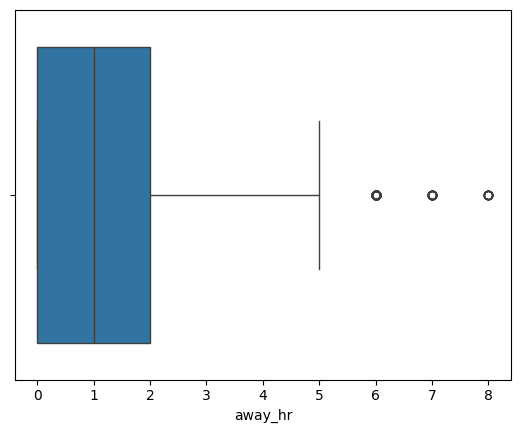

c:\Users\Hung Bui\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


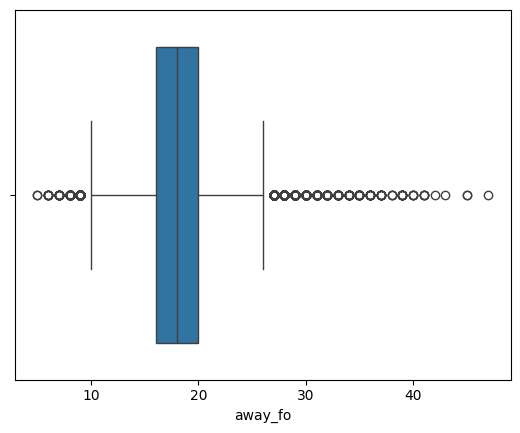

c:\Users\Hung Bui\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


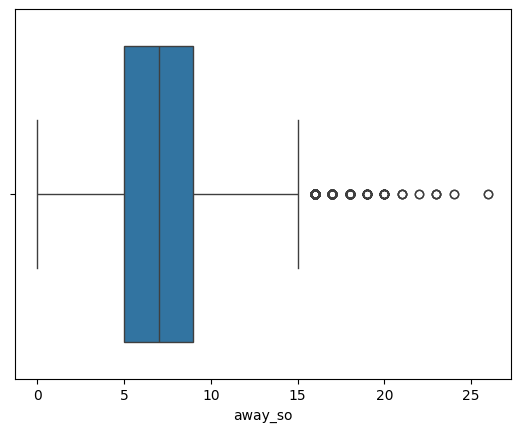

c:\Users\Hung Bui\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


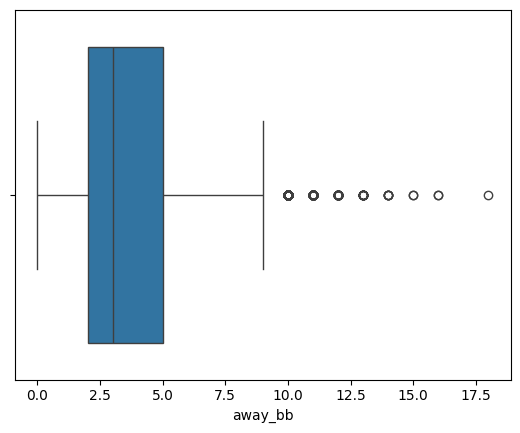

c:\Users\Hung Bui\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


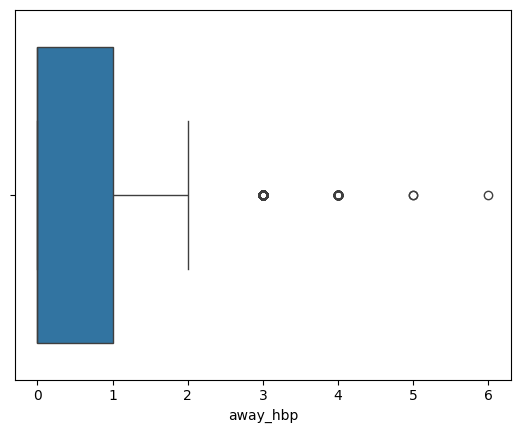

In [8]:
for i in numeric.columns:
    sns.boxplot(x=numeric[i], )
    plt.show()

c:\Users\Hung Bui\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


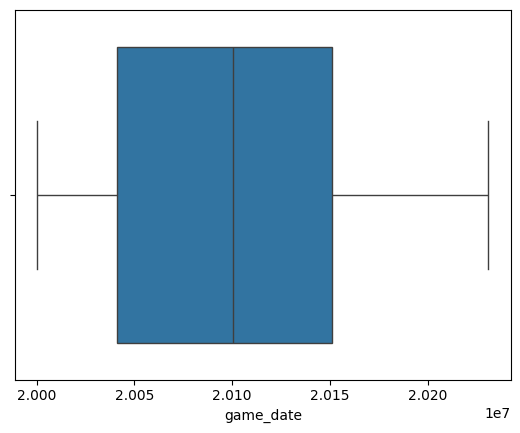

c:\Users\Hung Bui\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


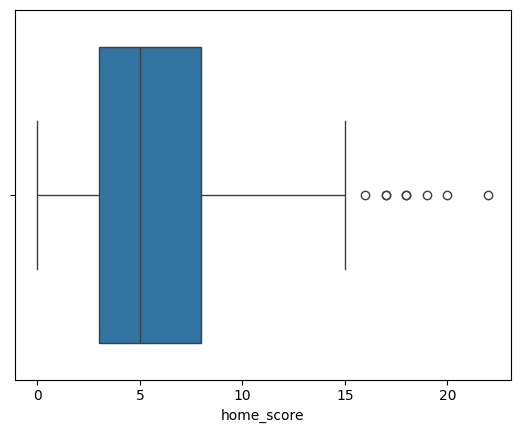

c:\Users\Hung Bui\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


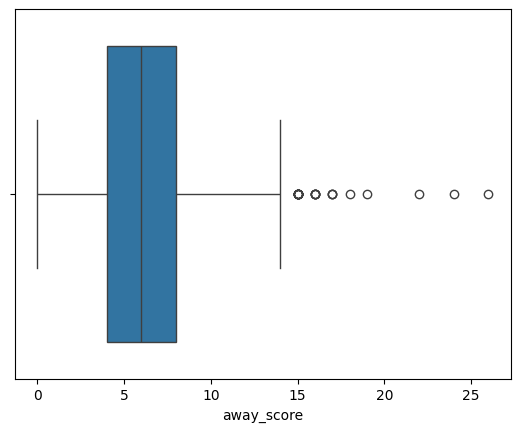

c:\Users\Hung Bui\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


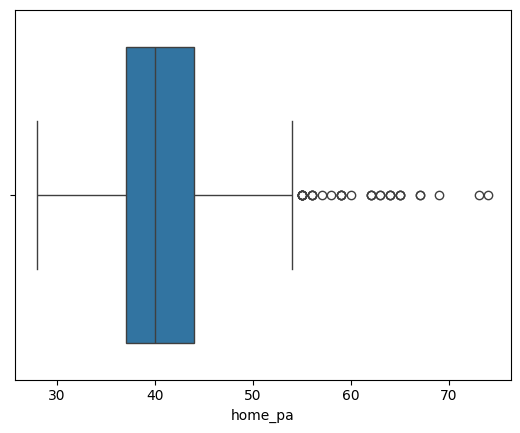

c:\Users\Hung Bui\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


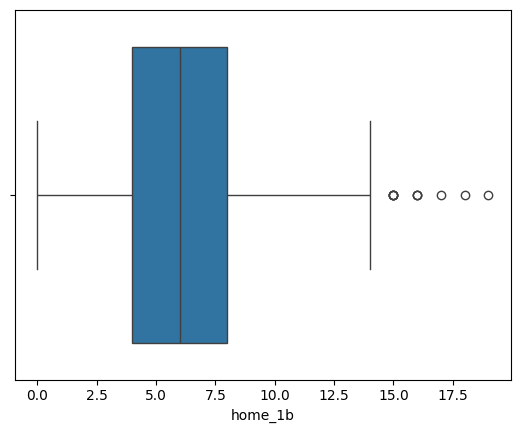

c:\Users\Hung Bui\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


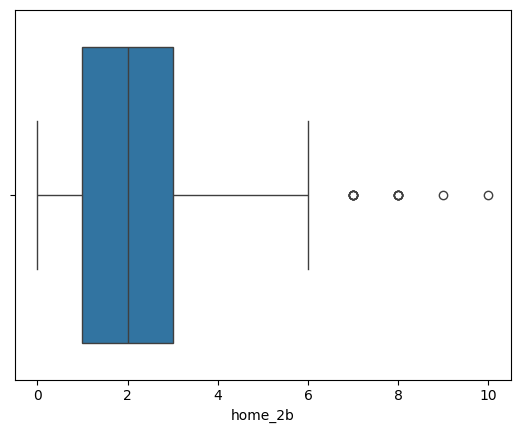

c:\Users\Hung Bui\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


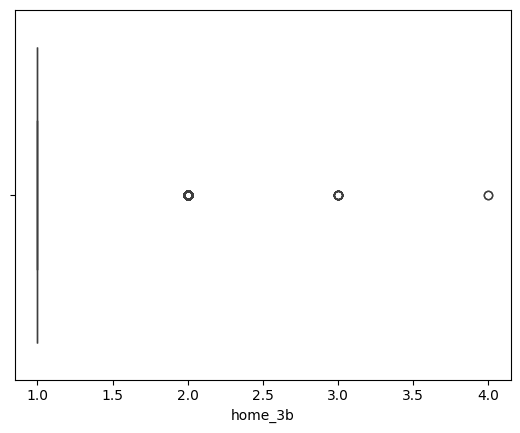

c:\Users\Hung Bui\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


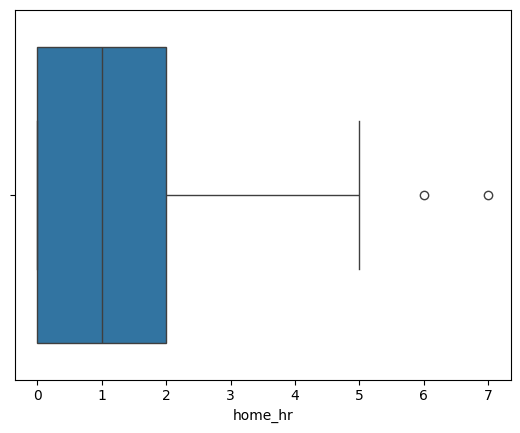

c:\Users\Hung Bui\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


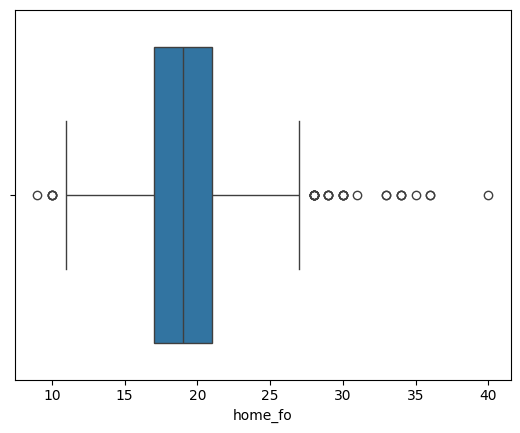

c:\Users\Hung Bui\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


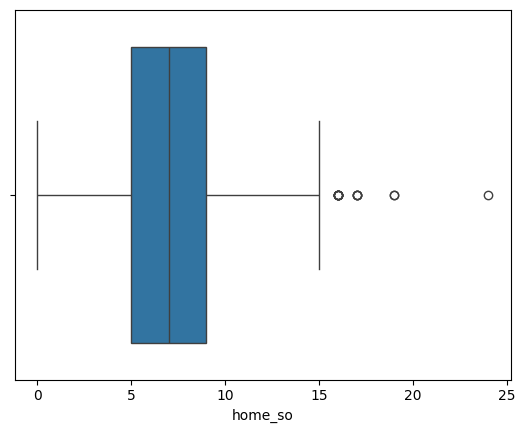

c:\Users\Hung Bui\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


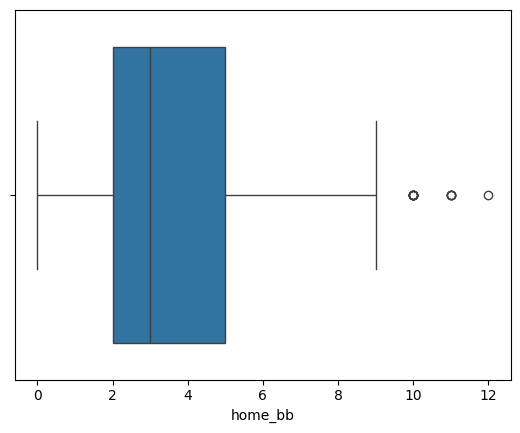

c:\Users\Hung Bui\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


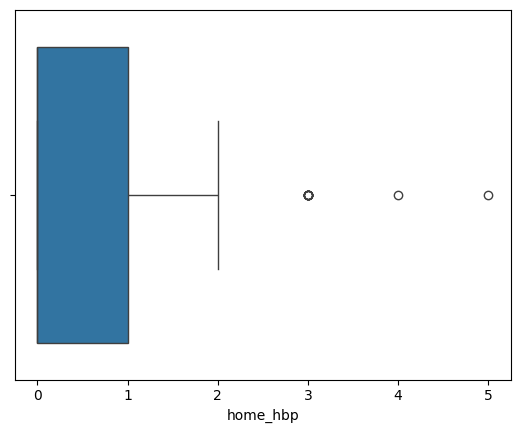

c:\Users\Hung Bui\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


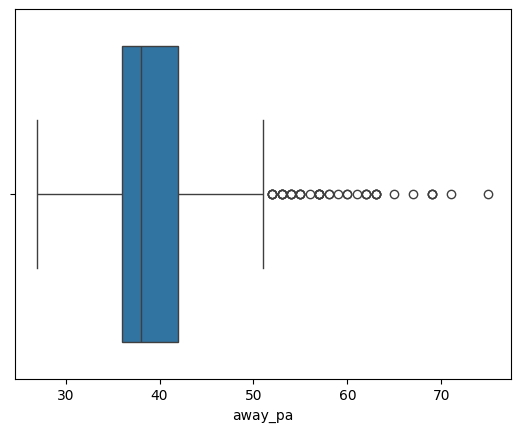

c:\Users\Hung Bui\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


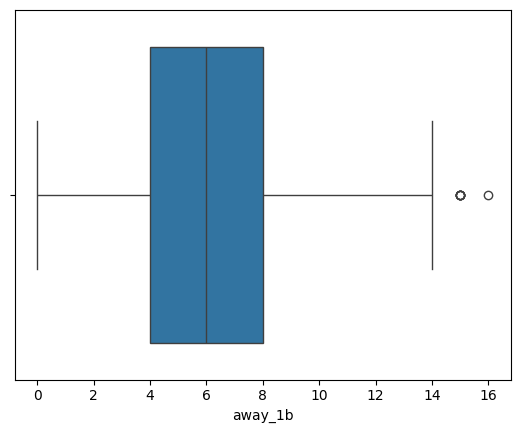

c:\Users\Hung Bui\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


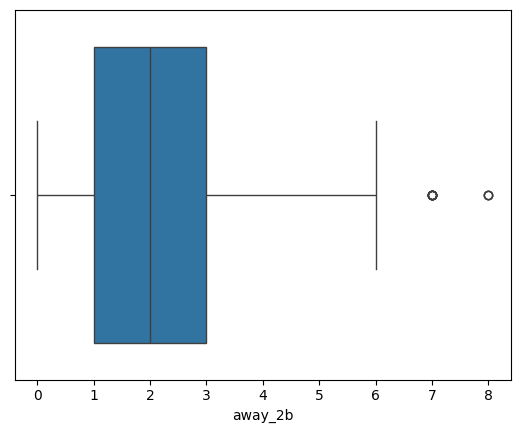

c:\Users\Hung Bui\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


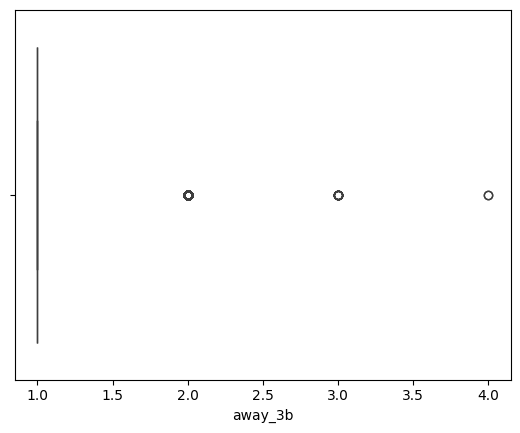

c:\Users\Hung Bui\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


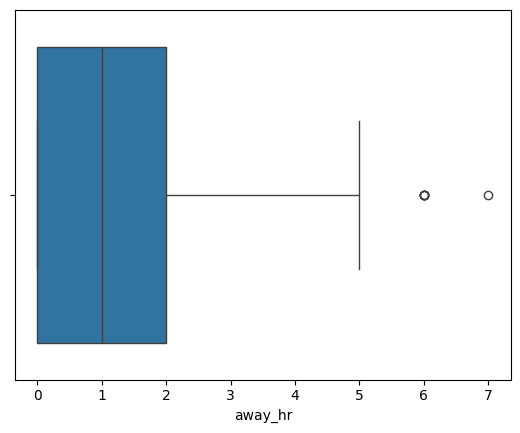

c:\Users\Hung Bui\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


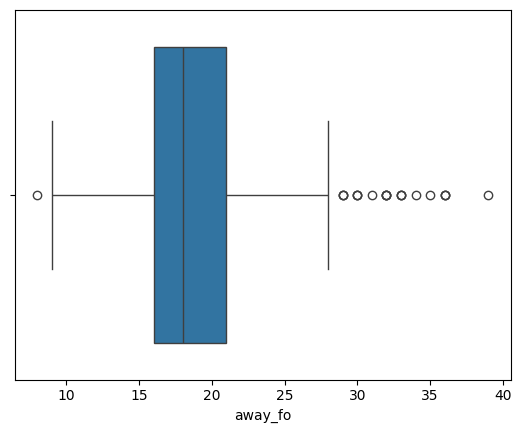

c:\Users\Hung Bui\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


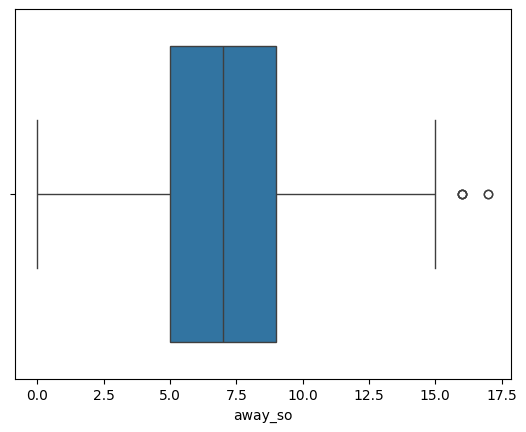

c:\Users\Hung Bui\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


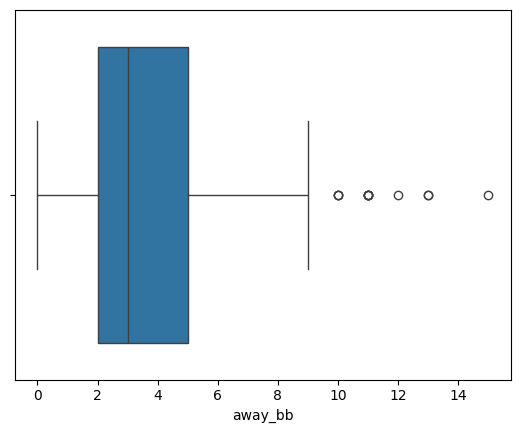

c:\Users\Hung Bui\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


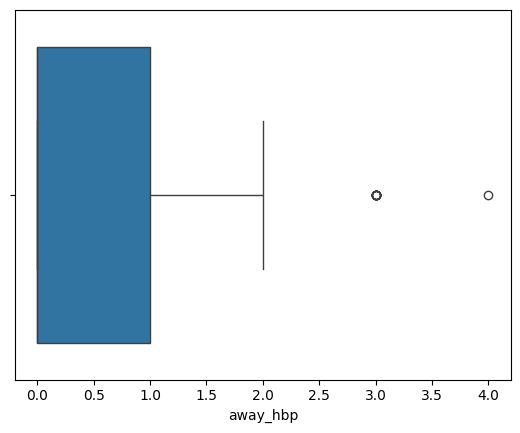

In [13]:
for i in numeric.columns:
    sns.boxplot(x=numeric[i], )
    plt.show()

In [14]:
# profile = ProfileReport(astro_df, title="Exploratory Data Analysis")

In [15]:
# profile.to_notebook_iframe()

In [16]:
astro_df

,game_date,home_team,away_team,is_day_game,home_score,away_score,venue,venue_name,city,state,home_pa,home_1b,home_2b,home_3b,home_hr,home_fo,home_so,home_bb,home_hbp,away_pa,away_1b,away_2b,away_3b,away_hr,away_fo,away_so,away_bb,away_hbp
78,20000408,KCA,MIN,True,5,2,KAN06,Kauffman Stadium,Kansas City,MO,37,3,1,1,1,20,8,3,0,33,7,2,1,0,22,1,0,0
107,20000411,HOU,SLN,False,6,10,HOU03,Minute Maid Park,Houston,TX,39,4,1,1,3,17,6,7,0,37,4,1,1,2,19,7,2,1
120,20000412,MIL,FLO,False,4,11,MIL05,County Stadium,Milwaukee,WI,46,6,2,1,2,20,5,9,1,40,5,1,1,1,20,7,5,0
149,20000414,PIT,NYN,False,5,8,PIT07,Three Rivers Stadium,Pittsburgh,PA,59,13,3,1,3,23,7,9,0,54,4,4,1,2,27,10,5,1
152,20000414,BOS,OAK,False,6,13,BOS07,Fenway Park,Boston,MA,48,6,1,1,3,16,12,8,1,40,11,0,1,0,19,8,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56597,20230918,HOU,BAL,False,7,8,HOU03,Minute Maid Park,Houston,TX,44,11,3,1,1,14,12,2,0,42,3,4,1,2,24,3,5,0
56601,20230919,ARI,SFN,False,8,4,PHO01,Chase Field,Phoenix,AZ,35,4,0,1,1,14,10,5,0,39,8,4,1,0,18,4,2,2
56649,20230922,HOU,KCA,False,5,7,HOU03,Minute Maid Park,Houston,TX,40,3,1,1,0,15,14,4,2,41,3,2,1,2,19,8,6,0
56659,20230923,PHI,NYN,True,7,5,PHI13,Citizens Bank Park,Philadelphia,PA,38,8,0,1,0,17,9,2,1,35,6,2,1,2,13,11,0,0


In [9]:
# Drop unnecessary columns
columns_to_drop = ['game_date', 'venue', 'venue_name', 'state', 'city']

astro_df.drop(columns_to_drop, axis=1, inplace=True)

In [18]:
astro_df

,home_team,away_team,is_day_game,home_score,away_score,home_pa,home_1b,home_2b,home_3b,home_hr,home_fo,home_so,home_bb,home_hbp,away_pa,away_1b,away_2b,away_3b,away_hr,away_fo,away_so,away_bb,away_hbp
78,KCA,MIN,True,5,2,37,3,1,1,1,20,8,3,0,33,7,2,1,0,22,1,0,0
107,HOU,SLN,False,6,10,39,4,1,1,3,17,6,7,0,37,4,1,1,2,19,7,2,1
120,MIL,FLO,False,4,11,46,6,2,1,2,20,5,9,1,40,5,1,1,1,20,7,5,0
149,PIT,NYN,False,5,8,59,13,3,1,3,23,7,9,0,54,4,4,1,2,27,10,5,1
152,BOS,OAK,False,6,13,48,6,1,1,3,16,12,8,1,40,11,0,1,0,19,8,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56597,HOU,BAL,False,7,8,44,11,3,1,1,14,12,2,0,42,3,4,1,2,24,3,5,0
56601,ARI,SFN,False,8,4,35,4,0,1,1,14,10,5,0,39,8,4,1,0,18,4,2,2
56649,HOU,KCA,False,5,7,40,3,1,1,0,15,14,4,2,41,3,2,1,2,19,8,6,0
56659,PHI,NYN,True,7,5,38,8,0,1,0,17,9,2,1,35,6,2,1,2,13,11,0,0


### Stack Home and Away Teams


In [10]:
home_cols = ['home_team', 'home_score', 'home_pa', 'home_1b', 
             'home_2b', 'home_3b', 'home_hr', 'home_fo', 'home_so',
            'home_bb', 'home_hbp', 'is_day_game']

away_cols = ['away_team', 'away_score', 'away_pa', 'away_1b', 
             'away_2b', 'away_3b', 'away_hr', 'away_fo', 'away_so',
            'away_bb', 'away_hbp', 'is_day_game']

In [11]:
home_df = astro_df[home_cols]
away_df = astro_df[away_cols]

In [13]:
# Add away team identifier
home_df.insert(0, 'is_away', 0)

ValueError: cannot insert is_away, already exists

In [14]:
away_df.insert(0, 'is_away', 1)

In [15]:
away_df

,is_away,away_team,away_score,away_pa,away_1b,away_2b,away_3b,away_hr,away_fo,away_so,away_bb,away_hbp,is_day_game
2,1,COL,0,32,5,0,0,2,17,6,1,1,True
3,1,MIL,3,20,3,1,0,1,10,4,1,0,True
4,1,SFN,4,38,9,3,0,0,17,7,1,1,False
5,1,LAN,10,38,7,0,0,2,19,8,2,0,False
6,1,SDN,1,30,2,1,0,1,16,7,2,1,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
56770,1,SDN,2,44,7,0,0,0,17,16,3,1,True
56771,1,CLE,2,38,4,4,0,1,16,7,6,0,True
56772,1,NYA,2,35,7,0,1,3,15,8,1,0,True
56773,1,TEX,0,30,4,0,0,0,14,10,1,1,True


In [16]:
home_df = home_df.rename(columns={'home_team':'team', 'home_score':'score', 'home_pa':'pa', 'home_1b':'singles',
                       'home_2b': 'doubles', 'home_3b': 'triples', 'home_hr':'homeruns', 'home_fo':'field_outs',
                       'home_so':'strikeouts', 'home_bb':'num_walks', 'home_hbp':'hit_by_pitches'})

In [17]:
away_df = away_df.rename(columns={'away_team':'team', 'away_score':'score', 'away_pa':'pa', 'away_1b':'singles',
                       'away_2b': 'doubles', 'away_3b': 'triples', 'away_hr':'homeruns', 'away_fo':'field_outs',
                       'away_so':'strikeouts', 'away_bb':'num_walks', 'away_hbp':'hit_by_pitches'})

In [26]:
home_df

,is_away,team,score,pa,singles,doubles,triples,homeruns,field_outs,strikeouts,num_walks,hit_by_pitches,is_day_game
78,0,KCA,5,37,3,1,1,1,20,8,3,0,True
107,0,HOU,6,39,4,1,1,3,17,6,7,0,False
120,0,MIL,4,46,6,2,1,2,20,5,9,1,False
149,0,PIT,5,59,13,3,1,3,23,7,9,0,False
152,0,BOS,6,48,6,1,1,3,16,12,8,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
56597,0,HOU,7,44,11,3,1,1,14,12,2,0,False
56601,0,ARI,8,35,4,0,1,1,14,10,5,0,False
56649,0,HOU,5,40,3,1,1,0,15,14,4,2,False
56659,0,PHI,7,38,8,0,1,0,17,9,2,1,True


In [18]:
stacked_df = pd.concat([home_df, away_df], ignore_index=True)
stacked_df

,is_away,team,score,pa,singles,doubles,triples,homeruns,field_outs,strikeouts,num_walks,hit_by_pitches,is_day_game
0,0,ATL,2,34,4,2,0,0,19,7,2,0,True
1,0,CIN,3,27,6,1,0,0,14,1,5,0,True
2,0,FLO,6,36,5,2,2,1,17,8,1,0,False
3,0,MON,4,43,6,0,1,2,26,4,4,0,False
4,0,NYN,2,33,4,0,0,1,19,8,0,1,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
113525,1,SDN,2,44,7,0,0,0,17,16,3,1,True
113526,1,CLE,2,38,4,4,0,1,16,7,6,0,True
113527,1,NYA,2,35,7,0,1,3,15,8,1,0,True
113528,1,TEX,0,30,4,0,0,0,14,10,1,1,True


In [19]:
# Calculating obd
# obp = [((row["singles"] + row["doubles"] + row["triples"] + row["homeruns"] + row["num_walks"] + row["hit_by_pitches"]) / (( row["num_walks"] + row["hit_by_pitches"]) if (row["num_walks"] + row["hit_by_pitches"]) != 0 else 1)) + (row["singles"] + row["doubles"] * 2 + row["triples"] * 3 + row["homeruns"] * 4) for index, row in stacked_df.iterrows()]
obp = [(row["singles"] + row["doubles"] + row["triples"] + row["homeruns"] + row["num_walks"] + row["hit_by_pitches"]) / (row["pa"]) for index, row in stacked_df.iterrows()]

stacked_with_obp_df = stacked_df
stacked_with_obp_df["obp"] = obp
stacked_with_obp_df.describe()

,is_away,score,pa,singles,doubles,triples,homeruns,field_outs,strikeouts,num_walks,hit_by_pitches,obp
count,113530.000000,113530.000000,113530.000000,113530.000000,113530.000000,113530.00000,113530.000000,113530.000000,113530.000000,113530.000000,113530.000000,113530.000000
mean,0.500000,4.561922,38.222109,5.764573,1.753880,0.17672,1.086779,18.465516,7.389430,3.221201,0.364010,0.316240
std,0.500002,3.165336,5.240556,2.692717,1.392708,0.43045,1.110174,3.340276,2.985855,2.072245,0.622668,0.082155
min,0.000000,0.000000,15.000000,0.000000,0.000000,0.00000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,35.000000,4.000000,1.000000,0.00000,0.000000,16.000000,5.000000,2.000000,0.000000,0.258065
50%,0.500000,4.000000,38.000000,6.000000,2.000000,0.00000,1.000000,18.000000,7.000000,3.000000,0.000000,0.315789
75%,1.000000,6.000000,41.000000,7.000000,3.000000,0.00000,2.000000,21.000000,9.000000,4.000000,1.000000,0.375000
max,1.000000,30.000000,90.000000,23.000000,11.000000,5.00000,8.000000,49.000000,26.000000,18.000000,6.000000,0.636364


c:\Users\Hung Bui\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Hung Bui\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


<Axes: xlabel='team', ylabel='obp'>

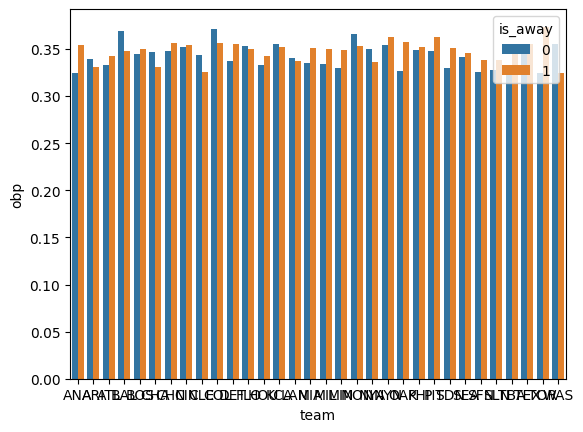

In [29]:
grouped_data = stacked_with_obp_df.groupby(by=["team" ,"is_away"]).mean()
sns.barplot(x="team", y="obp", hue="is_away", data=grouped_data)


In [54]:
ttest_ind(stacked_with_obp_df[(stacked_with_obp_df["is_away"] == 0) & (stacked_with_obp_df['team'] == "HOU")]["obp"], stacked_with_obp_df[(stacked_with_obp_df["is_away"] == 1) & (stacked_with_obp_df['team'] == "HOU")]["obp"])

TtestResult(statistic=-0.5473643226675471, pvalue=0.5854257240699965, df=94.0)

In [22]:
stacked_with_obp_df[stacked_with_obp_df["team"] == "HOU"]

,is_away,team,score,pa,singles,doubles,triples,homeruns,field_outs,strikeouts,num_walks,hit_by_pitches,is_day_game,obp
55,0,HOU,1,35,3,1,0,2,21,5,3,0,False,0.257143
70,0,HOU,8,38,7,3,0,1,19,4,3,1,True,0.394737
85,0,HOU,2,38,5,2,0,0,22,4,5,0,True,0.315789
97,0,HOU,7,42,5,3,1,4,15,10,3,1,False,0.404762
105,0,HOU,6,39,4,1,1,3,17,6,7,0,False,0.410256
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113456,1,HOU,2,36,7,0,0,1,13,11,4,0,False,0.333333
113472,1,HOU,8,43,6,1,0,1,10,16,9,0,False,0.395349
113485,1,HOU,2,35,2,2,0,0,23,4,4,0,False,0.228571
113499,1,HOU,1,37,5,0,0,0,17,8,6,1,False,0.324324


In [29]:

for team in stacked_with_obp_df["team"].unique():
    print(team, ttest_ind(stacked_with_obp_df[(stacked_with_obp_df["is_away"] == 1) & (stacked_with_obp_df['team'] == team)]["obp"], stacked_with_obp_df[(stacked_with_obp_df["is_away"] == 0) & (stacked_with_obp_df['team'] == team)]["obp"]))

ATL TtestResult(statistic=4.786442229169607, pvalue=1.7625723371370798e-06, df=3781.0)
CIN TtestResult(statistic=3.476648633032447, pvalue=0.0005134317528547214, df=3786.0)
FLO TtestResult(statistic=3.989911700929464, pvalue=6.855380687231502e-05, df=1940.0)
MON TtestResult(statistic=2.3116451735843766, pvalue=0.021047950932762207, df=808.0)
NYN TtestResult(statistic=8.254524900304457, pvalue=2.0840908201479415e-16, df=3780.0)
SLN TtestResult(statistic=7.74780087440799, pvalue=1.1928540319156959e-14, df=3781.0)
ANA TtestResult(statistic=5.667463212657008, pvalue=1.5573933748224932e-08, df=3784.0)
BAL TtestResult(statistic=3.8160658891728825, pvalue=0.00013776306229757915, df=3784.0)
MIN TtestResult(statistic=5.439054526100751, pvalue=5.695292992160912e-08, df=3785.0)
OAK TtestResult(statistic=8.635607257756762, pvalue=8.483649554727106e-18, df=3776.0)
TEX TtestResult(statistic=0.869975836284146, pvalue=0.38436877695485905, df=3785.0)
TOR TtestResult(statistic=4.582570910548089, pvalue=

c:\Users\Hung Bui\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Hung Bui\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


<Axes: xlabel='team', ylabel='obp'>

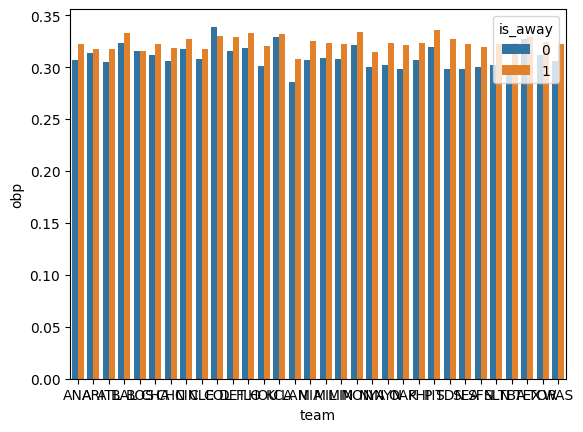

In [25]:
grouping = stacked_with_obp_df.groupby(by=["team" ,"is_away"]).mean()
sns.barplot(x="team", y="obp", hue="is_away", data=grouping)

In [28]:
grouping.reset_index(inplace=True)

sum = 0
for index, row in grouping.iterrows():
    if (row["is_away"] == 1):
        sum -= row["obp"]
    else:
        sum += row["obp"]

sum


-0.4464595408312522